# Face detection and BMI/Age/Sex prediction

## Face detection

face detection is done by `MTCNN`, which is able to detect multiple faces within an image and draw the bounding box for each faces. 

It serves two purposes for this project:
 * 1) preprocess and align the facial features of image

      ![](./img/mtcnn_face_alignment.jpg)
      
 * 2) enable prediction for multiple persons in the same image
 
     ![](./img/detect_predict_multi_faces.png)


## Multi-task prediction


pretrained model `VGG-Face` is used 


## Reference
 * MTCNN: [https://github.com/ipazc/mtcnn](https://github.com/ipazc/mtcnn)
 * VGGFace: [https://github.com/rcmalli/keras-vggface](https://github.com/rcmalli/keras-vggface)

In [1]:
mode = 'train'
model_type = 'vgg16_fc6'
model_dir = './saved_model/model_'+model_type + '.h5'
bs = 8
epochs = 20

In [2]:
import pandas as pd
import os
import json
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from models import FacePrediction

allimages = os.listdir('./face_aligned/')
train = pd.read_csv('./train.csv')
valid = pd.read_csv('./valid.csv')

train = train.loc[train['index'].isin(allimages)]
valid = valid.loc[valid['index'].isin(allimages)]

Using TensorFlow backend.


## Training

In [3]:
es = EarlyStopping(patience=3)
ckp = ModelCheckpoint(model_dir, save_best_only=True, save_weights_only=True, verbose=1)
tb = TensorBoard('./tb/%s'%(model_type))
callbacks = [es, ckp, tb]

model = FacePrediction(img_dir = './face_aligned/', model_type = model_type)
model.define_model()
model.model.summary()
if mode == 'train':
    model.train(train, valid, bs = bs, epochs = epochs, callbacks = callbacks)
else:
    model.load_weights(model_dir)

W0116 08:47:04.490833  9348 deprecation_wrapper.py:119] From C:\Users\n174724\.conda\envs\face2bmi\lib\site-packages\mtcnn\mtcnn.py:187: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0116 08:47:04.490833  9348 deprecation_wrapper.py:119] From C:\Users\n174724\.conda\envs\face2bmi\lib\site-packages\mtcnn\mtcnn.py:193: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0116 08:47:05.134451  9348 deprecation_wrapper.py:119] From C:\Users\n174724\.conda\envs\face2bmi\lib\site-packages\mtcnn\network.py:43: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0116 08:47:05.139453  9348 deprecation_wrapper.py:119] From C:\Users\n174724\.conda\envs\face2bmi\lib\site-packages\mtcnn\layer_factory.py:88: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0116 08:47:05.139453  9348 deprecation_wrapper.py:119] From C:\Users\n174724\.conda\envs\face2bmi\lib\sit

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv1_2 (Conv2D)                (None, 224, 224, 64) 36928       conv1_1[0][0]                    
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 112, 112, 64) 0           conv1_2[0][0]                    
__________________________________________________________________________________________________
conv2_1 (C

W0116 08:47:12.412258  9348 deprecation_wrapper.py:119] From C:\Users\n174724\.conda\envs\face2bmi\lib\site-packages\keras\callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0116 08:47:12.412258  9348 deprecation_wrapper.py:119] From C:\Users\n174724\.conda\envs\face2bmi\lib\site-packages\keras\callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/20
153/153 [==============================] - 28s 180ms/step - loss: 20.1200 - bmi_loss: 21.5481 - age_loss: 28.6264 - sex_loss: 0.1883 - sex_acc: 0.9265 - val_loss: 13.9772 - val_bmi_loss: 14.7092 - val_age_loss: 22.0018 - val_sex_loss: 0.0966 - val_sex_acc: 0.9671

Epoch 00001: val_loss improved from inf to 13.97722, saving model to ./saved_model/model_vgg16_fc6.h5
Epoch 2/20
153/153 [==============================] - 24s 158ms/step - loss: 7.9278 - bmi_loss: 8.2145 - age_loss: 13.4599 - sex_loss: 0.1012 - sex_acc: 0.9673 - val_loss: 5.1664 - val_bmi_loss: 5.4088 - val_age_loss: 8.2967 - val_sex_loss: 0.0974 - val_sex_acc: 0.9572

Epoch 00002: val_loss improved from 13.97722 to 5.16645, saving model to ./saved_model/model_vgg16_fc6.h5
Epoch 3/20
153/153 [==============================] - 24s 159ms/step - loss: 3.4098 - bmi_loss: 3.5273 - age_loss: 5.8357 - sex_loss: 0.0434 - sex_acc: 0.9894 - val_loss: 3.7637 - val_bmi_loss: 3.9663 - val_age_loss: 5.8486 - val_sex_loss: 0.057

## Evaluations

In [7]:
metrics = model.evaulate(valid)
metrics['model'] = model_type
with open('./metrics/{:s}.json'.format(model_type), 'w') as f:
    json.dump(metrics, f)
metrics

{'bmi_rmse': 5.0305690731585075,
 'age_rmse': 5.636910356990782,
 'sex_auc': 0.9948266595001345,
 'model': 'vgg16_fc6'}

## Predictions

### predict from a single image

In [4]:
model.predict('./test_aligned/trump.jpg')

[array([[30.227245]], dtype=float32),
 array([[72.02152]], dtype=float32),
 array([[0.0902881]], dtype=float32)]

### predict from a directory

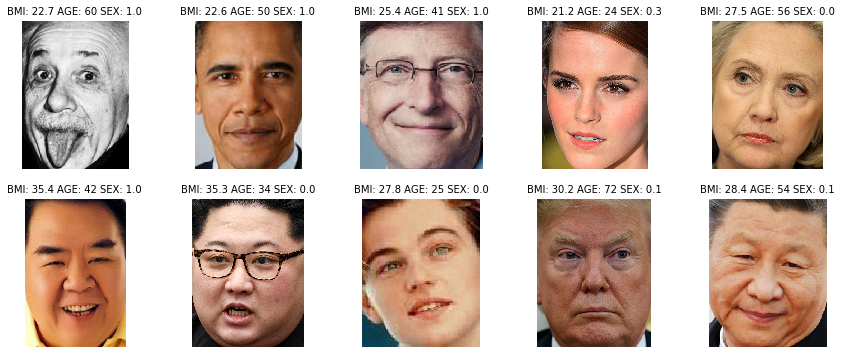

In [5]:
preds = model.predict('./test_aligned/', show_img = True)

In [6]:
model.predict_df('./test_aligned')

img        bmi        age     sex  sex_prob
0  albert-einstein.jpg  22.691845  60.279037    Male  0.996736
1     barack-obama.jpg  22.567196  50.151237    Male  0.999872
2       bill-gates.jpg  25.436068  40.788483    Male  0.999852
3      emma_watson.jpg  21.171165  23.724491  Female  0.289879
4   hilary_clinton.jpg  27.546535  56.062698  Female  0.000004
5       kent_zheng.jpg  35.423393  42.412579    Male  0.957801
6      Kim Jong-un.jpg  35.317104  33.675323  Female  0.000210
7        leonardo.jpeg  27.833967  24.635994  Female  0.005735
8            trump.jpg  30.227251  72.021523  Female  0.090288
9               xi.jpg  28.426180  53.587479  Female  0.062817

### predict multiple faces

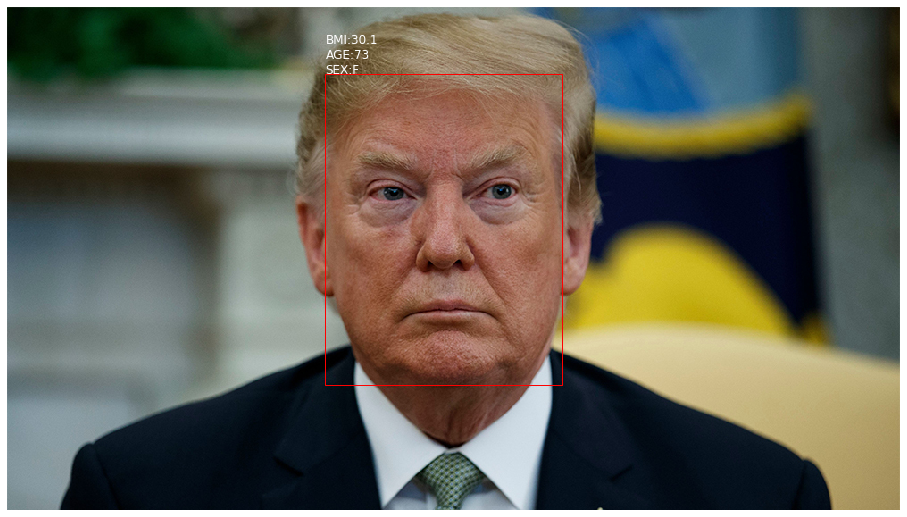

In [8]:
preds = model.predict_faces('./test/trump.jpg')

### Westerners

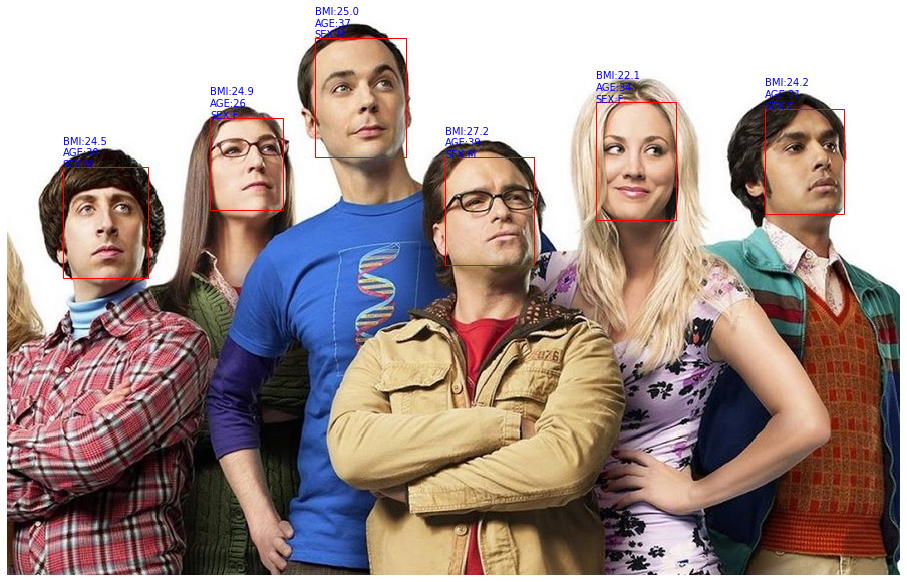

In [9]:
preds = model.predict_faces('./test_mf/the-big-bang-theory-op-netflix.jpg', color = 'blue', fontsize=10, confidence=0.95)

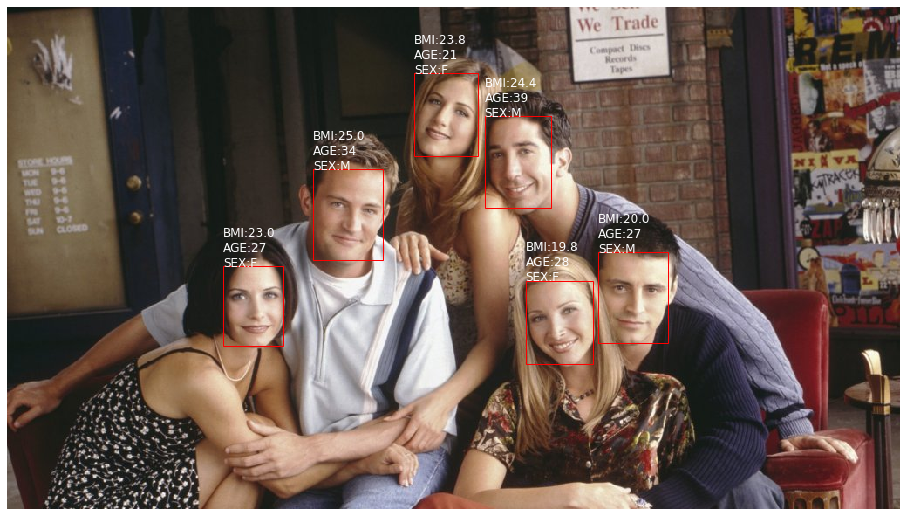

In [10]:
preds = model.predict_faces('./test_mf/friends.jpg', color = 'white')

### Asians

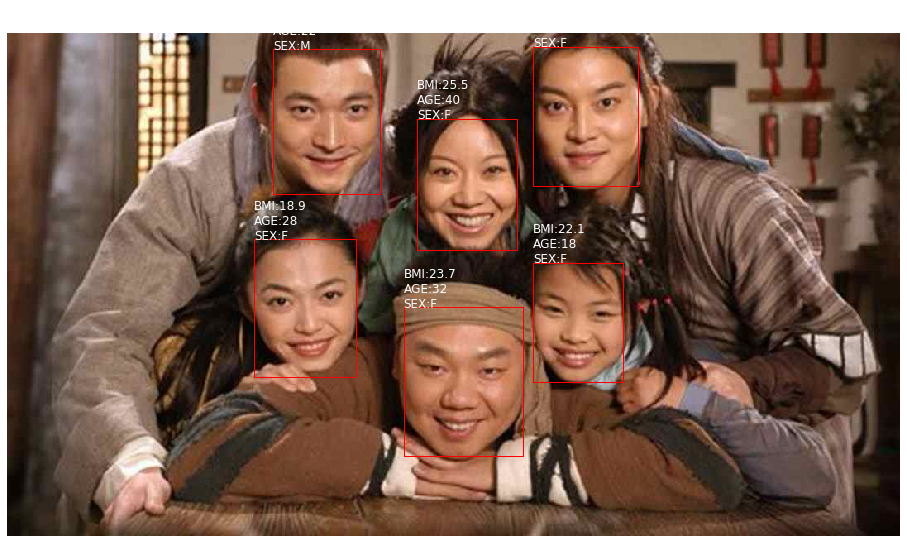

In [11]:
preds = model.predict_faces('./test_mf/wulinwaizhuan.jpg', color = 'white')